# SpamAndHamClassification

In [8]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt',sep='\t', names=['label','messages'])

#### sep means Seperator, in the dataset, the columns are seperated by tab as seprator.

###

In [3]:
messages.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### In this Dataset, Messages is the Input Feature , then Label is the Dependent Feature

In [5]:
messages.shape

(5572, 2)

# The process we are gonna implement:
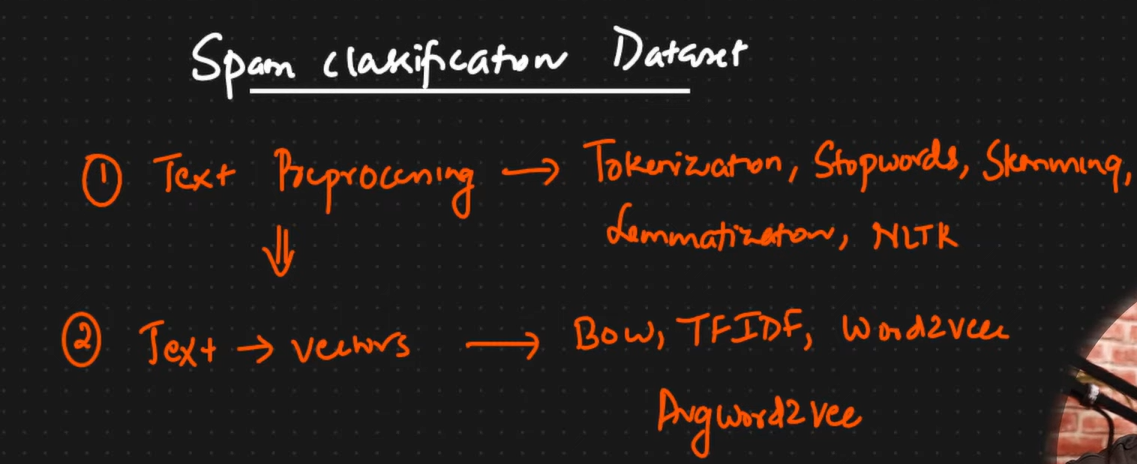

In [1]:
import nltk

In [2]:
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anirudh31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


In [4]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

## Cleaning and implementing Stemming on the MEssages column

In [21]:
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^A-Za-z0-9]', ' ', messages['messages'][i])
    review = review.lower()
    review = review.split()
    
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

## Implementing Bag Of Words:

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)

In [38]:
X = cv.fit_transform(corpus).toarray()

In [39]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

In [40]:
X.shape

(5572, 2500)

In [42]:
y = pd.get_dummies(messages['label'])

In [43]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [44]:
y = y.iloc[:,1].values

In [45]:
y

array([False, False,  True, ..., False, False, False], shape=(5572,))

In [46]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [47]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [48]:
preds = model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report
report = classification_report(preds,y_test)

In [50]:
report

'              precision    recall  f1-score   support\n\n       False       0.99      0.99      0.99      1208\n        True       0.93      0.95      0.94       185\n\n    accuracy                           0.98      1393\n   macro avg       0.96      0.97      0.97      1393\nweighted avg       0.98      0.98      0.98      1393\n'

In [51]:
model.score(x_test,y_test)

0.9842067480258435